# Laplacian Filter

In [ ]:
#Python program to implement Laplacian filter by specifying kernel values with built in functions

In [2]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#function to implement laplacian filter
def laplacian_filter(image_path):
    # Define the Laplacian kernel
    laplacian_kernel = np.array([[0,  1, 0],
                                 [1, -4, 1],
                                 [0,  1, 0]])

    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at the path: {image_path}")

    # Apply the Laplacian filter using the custom kernel
    laplacian = cv2.filter2D(image, -1, laplacian_kernel)

    # Convert the result to a suitable type for display
    laplacian = np.uint8(np.absolute(laplacian))
    
    #Display the original and Laplacian filtered images using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Laplacian Filtered Image')
    plt.imshow(laplacian, cmap='gray')
    plt.axis('off')

    plt.show()

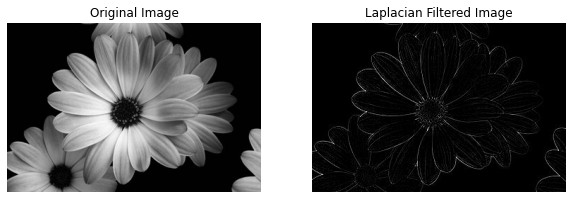

In [4]:
# Provide the path to your image file
image_path = 'flower.jpg'
laplacian_filter(image_path)

In [ ]:
#Python program to implement Laplacian filter by specifyin kernel values without built in functions

In [5]:
#import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
#function to implement laplacian filter
def filter_manual(image_path):
    # Define the Laplacian kernel
    laplacian_kernel = np.array([[0,  1, 0],
                                 [1, -4, 1],
                                 [0,  1, 0]])
    
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at the path: {image_path}")

    # Get image dimensions
    img_height, img_width = image.shape
    
    # Initialize the output image
    filtered_image = np.zeros_like(image)

    # Apply the Laplacian kernel manually
    for i in range(1, img_height-1):
        for j in range(1, img_width-1):
            # Extract the region of interest
            region = image[i-1:i+2, j-1:j+2]
            
            # Perform element-wise multiplication and sum the results
            filtered_value = np.sum(region * laplacian_kernel)
            
            # Store the result in the output image
            filtered_image[i, j] = np.clip(np.abs(filtered_value), 0, 255)

    # Display the original and filtered images using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Manual Laplacian Filtered Image')
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.show()

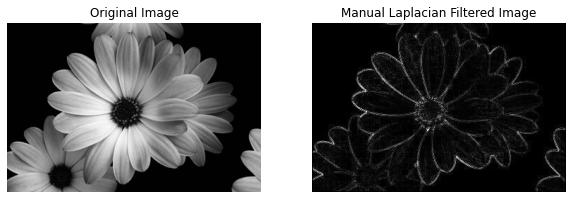

In [7]:
# Provide the path to your image file
image_path = 'flower.jpg'
filter_manual(image_path)

# Average,Minimum,Maximum Filter

In [8]:
#Python program to implement average,max,min filter using built in functions

Enter the image name: white.jpg


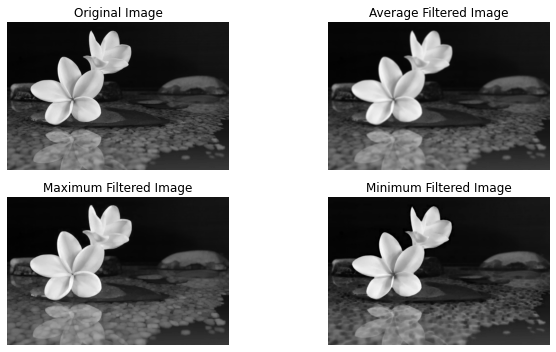

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply filters and visualize images
def apply_filters(image_path, kernel_size=3):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at the path: {image_path}")

    # Create a kernel with the specified size
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    # Apply average filter using OpenCV's blur function
    averaged_image = cv2.blur(image, (kernel_size, kernel_size))
    
    # Apply the min filter (erosion) with the kernel to perform the min filter
    min_filtered_image = cv2.erode(image, kernel)
    
    # Apply the max filter (dilation) with the kernel to perform the max filter
    max_filtered_image = cv2.dilate(image, kernel)
    
    # Display the images using matplotlib
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Average Filtered Image
    plt.subplot(2, 2, 2)
    plt.imshow(averaged_image, cmap='gray')
    plt.title('Average Filtered Image')
    plt.axis('off')

    # Maximum Filtered Image
    plt.subplot(2, 2, 3)
    plt.imshow(max_filtered_image, cmap='gray')
    plt.title('Maximum Filtered Image')
    plt.axis('off')

    # Minimum Filtered Image
    plt.subplot(2, 2, 4)
    plt.imshow(min_filtered_image, cmap='gray')
    plt.title('Minimum Filtered Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
image_path = input('Enter the image name: ')  # Replace with your image path
apply_filters(image_path, kernel_size=3)